# Data Preprocessing: Glycemic Index Dataset

This preprocessing pipeline works with the [`aarogyabhandari/gi-pred`](https://www.kaggle.com/datasets/aarogyabhandari/gi-pred) dataset, which contains nutritional information for various foods. It filters the data for diabetic suitability and visualizes nutritional trends to support model development.

## Key Steps

### 1. Dataset Loading
- Uses the `kagglehub` library to download the latest version of the dataset.
- Reads the dataset into a pandas DataFrame.

### 2. Data Cleaning
- Converts the `'suitable for diabetes'` column to binary: `1` if it contains "yes" (case-insensitive), `0` otherwise.
- Filters the dataset to keep only diabetes-suitable foods.
- Retains only relevant columns: `'food name'`, `'glycemic index'`, and `'carbohydrates'`.

### 3. Data Visualization
- **Glycemic Index Distribution**: A histogram showing the spread of glycemic index values across foods.
- **Carbohydrate Distribution**: A histogram showing the distribution of carbohydrate content.
- **Top 20 Foods by Glycemic Index**: A horizontal bar chart of foods with the highest GI values.
- **Top 20 Foods by Carbohydrates**: A horizontal bar chart of foods with the highest carbohydrate content.

### 4. Data Output
- The cleaned, filtered dataset is saved as `cleaned_diabetic_foods.csv`in directory `processed_data`.
- All visualizations are saved in the `visualizations/` directory in PNG format.

## 📁 Output Directory
- `visualizations/`: Contains all distribution plots.
- `processed_data/`: Contains processed dataset.

### Imports, Loading Dataset

In [2]:
!pip install kagglehub

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import os
import seaborn as sns

In [2]:
# Create output directory for visualizations and processed data

os.makedirs('visualizations', exist_ok=True)
os.makedirs('processed_data', exist_ok=True)

In [3]:
path = kagglehub.dataset_download("aarogyabhandari/gi-pred")
print("Path to dataset files:", path)

file_path = os.path.join(path, "pred_food_2.csv")
df = pd.read_csv(file_path)

Path to dataset files: C:\Users\92310\.cache\kagglehub\datasets\aarogyabhandari\gi-pred\versions\1


### Summary Statistics

In [4]:
# Display dataset info and check for null values

print("\nDataset Info:")
print(df.info())
print("\nNull values in each column:")
print(df.isnull().sum())
print("\nPercentage of null values in each column:")
print((df.isnull().sum() / len(df) * 100).round(2))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Food Name                    5000 non-null   object 
 1   Glycemic Index               5000 non-null   int64  
 2   Calories                     5000 non-null   int64  
 3   Carbohydrates                5000 non-null   float64
 4   Protein                      5000 non-null   float64
 5   Fat                          5000 non-null   float64
 6   Suitable for Diabetes        5000 non-null   object 
 7   Suitable for Blood Pressure  5000 non-null   int64  
 8   Sodium Content               5000 non-null   int64  
 9   Potassium Content            5000 non-null   int64  
 10  Magnesium Content            5000 non-null   int64  
 11  Calcium Content              5000 non-null   int64  
 12  Fiber Content                4982 non-null   float64
dtypes: 

In [5]:
print(df.head())

       Food Name  Glycemic Index  Calories  Carbohydrates  Protein    Fat  \
0  Shawarma Wrap              20       400           25.0     30.0  18.55   
1       Samboosa              83       239           20.0     10.0  14.00   
2          Kheer              65       180           25.0      2.0  17.00   
3       Rasgulla              93       186           23.6      4.0   8.00   
4      Mushrooms              70        89           21.0      2.0   0.40   

  Suitable for Diabetes  Suitable for Blood Pressure  Sodium Content  \
0                     1                            1             972   
1                     1                            0             580   
2                     1                            1             360   
3                     1                            1              95   
4                     1                            1              54   

   Potassium Content  Magnesium Content  Calcium Content  Fiber Content  
0                420          

### Cleaning 

In [6]:
# Keep relevant columns
df = df[['Food Name', 'Glycemic Index','Calories', 'Carbohydrates', 'Protein', 'Fat', 'Fiber Content']]

In [7]:
print(df.head())
# note - it is possible for foods to have a glycemic index of 0 or close to 0

       Food Name  Glycemic Index  Calories  Carbohydrates  Protein    Fat  \
0  Shawarma Wrap              20       400           25.0     30.0  18.55   
1       Samboosa              83       239           20.0     10.0  14.00   
2          Kheer              65       180           25.0      2.0  17.00   
3       Rasgulla              93       186           23.6      4.0   8.00   
4      Mushrooms              70        89           21.0      2.0   0.40   

   Fiber Content  
0            3.0  
1            2.0  
2            0.9  
3            0.0  
4            3.3  


### Visualisation

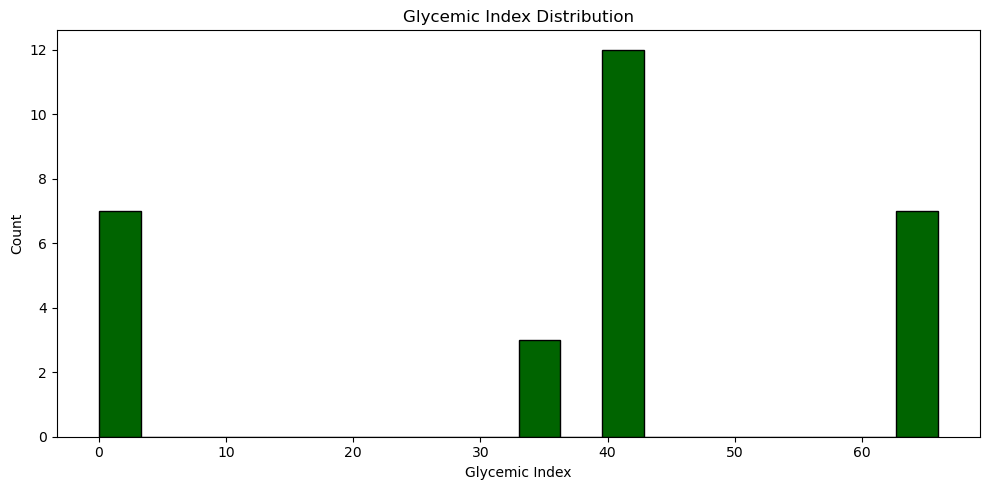

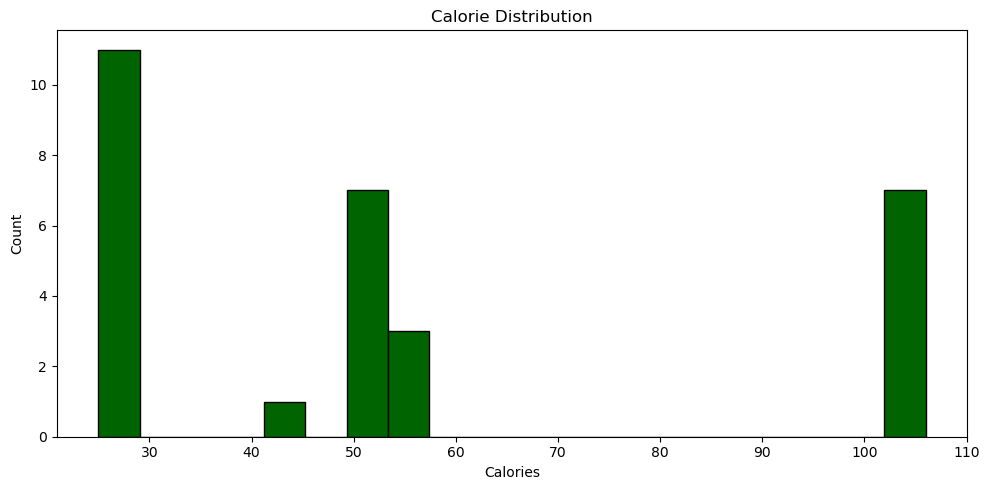

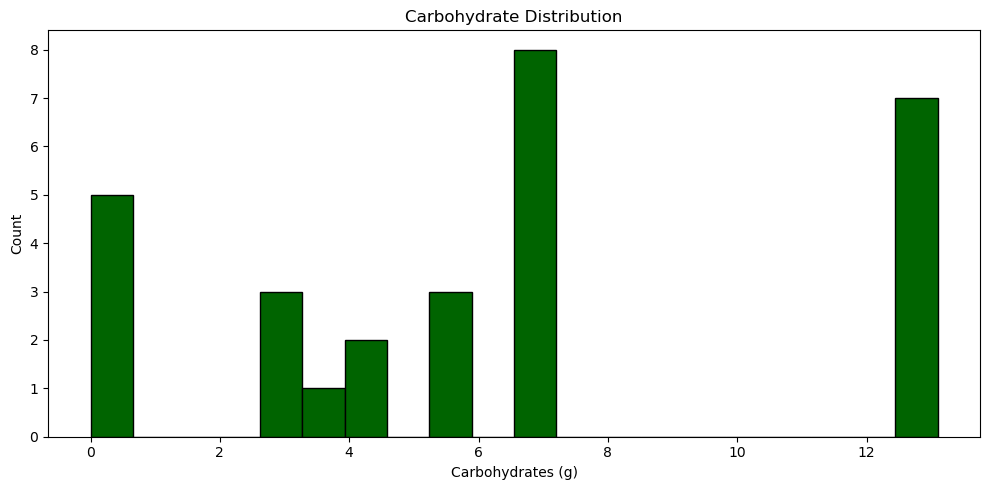

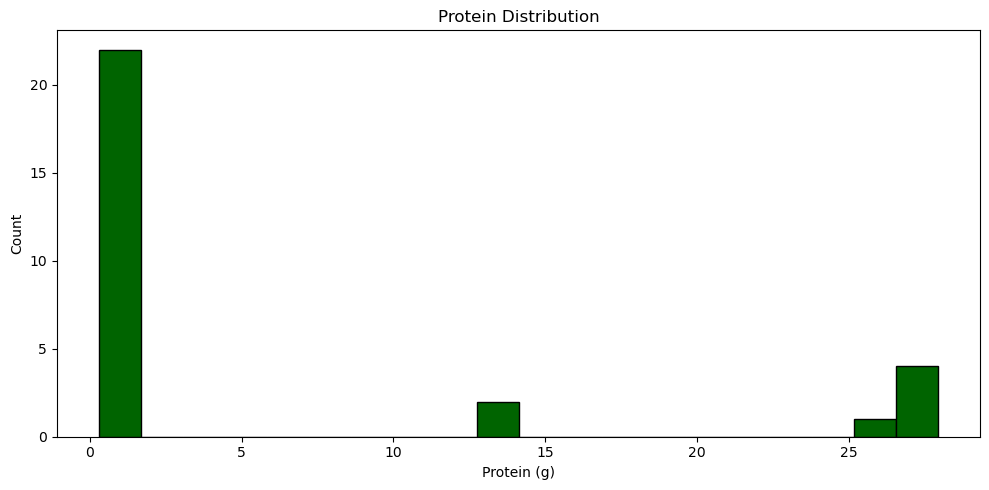

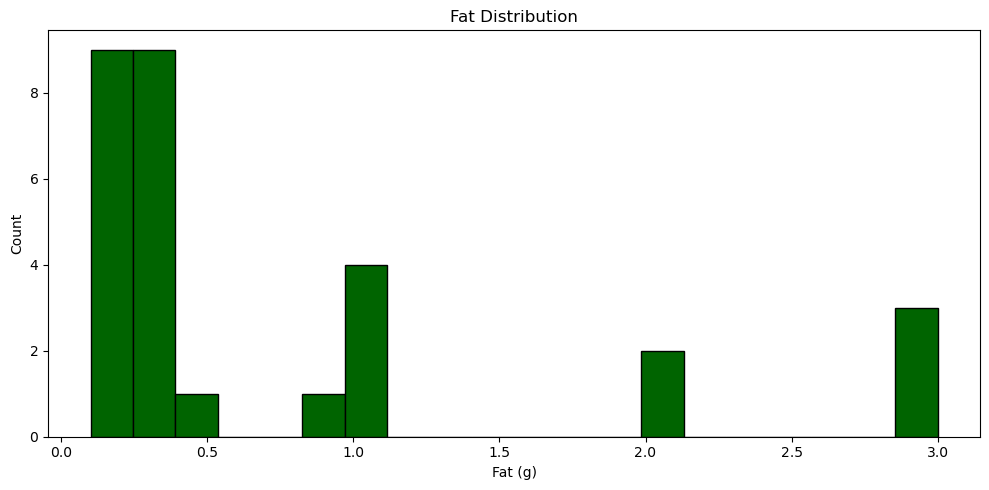

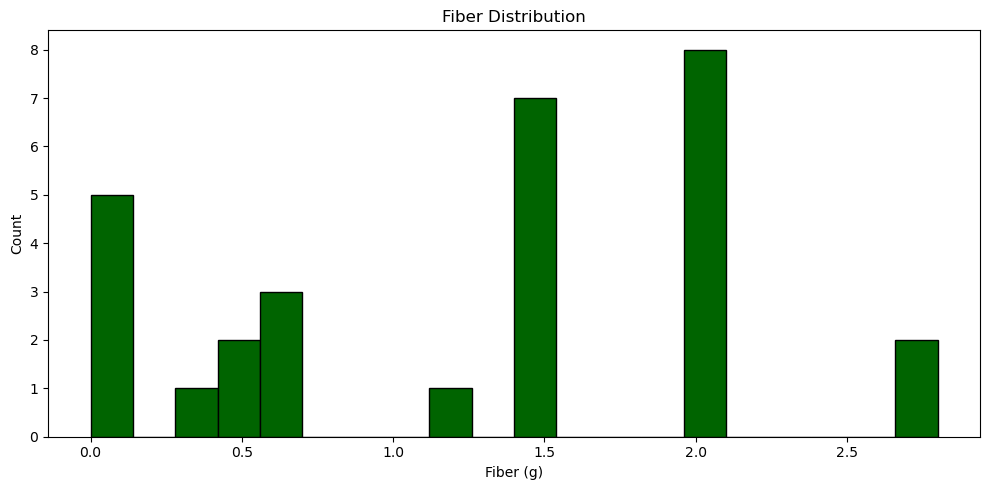

In [15]:
# Glycemic Index distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Glycemic Index'].dropna(), bins=20, color='darkgreen',edgecolor='black')
plt.title('Glycemic Index Distribution')
plt.xlabel('Glycemic Index')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('visualizations/gi_distribution.png', dpi=300)
plt.show()
plt.close()

# Calorie distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Calories'].dropna(), bins=20, color='darkgreen',edgecolor='black')
plt.title('Calorie Distribution')
plt.xlabel('Calories')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('visualizations/calorie_distribution.png', dpi=300)
plt.show()
plt.close()

# Carbohydrate distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Carbohydrates'].dropna(), bins=20, color='darkgreen',edgecolor='black')
plt.title('Carbohydrate Distribution')
plt.xlabel('Carbohydrates (g)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('visualizations/carb_distribution.png', dpi=300)
plt.show()
plt.close()

# Protein distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Protein'].dropna(), bins=20, color='darkgreen',edgecolor='black')
plt.title('Protein Distribution')
plt.xlabel('Protein (g)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('visualizations/protein_distribution.png', dpi=300)
plt.show()
plt.close()

# Fat distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Fat'].dropna(), bins=20, color='darkgreen',edgecolor='black')
plt.title('Fat Distribution')
plt.xlabel('Fat (g)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('visualizations/fat_distribution.png', dpi=300)
plt.show()
plt.close()

# Fiber distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Fiber Content'].dropna(), bins=20, color='darkgreen',edgecolor='black')
plt.title('Fiber Distribution')
plt.xlabel('Fiber (g)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('visualizations/fiber_distribution.png', dpi=300)
plt.show()
plt.close()

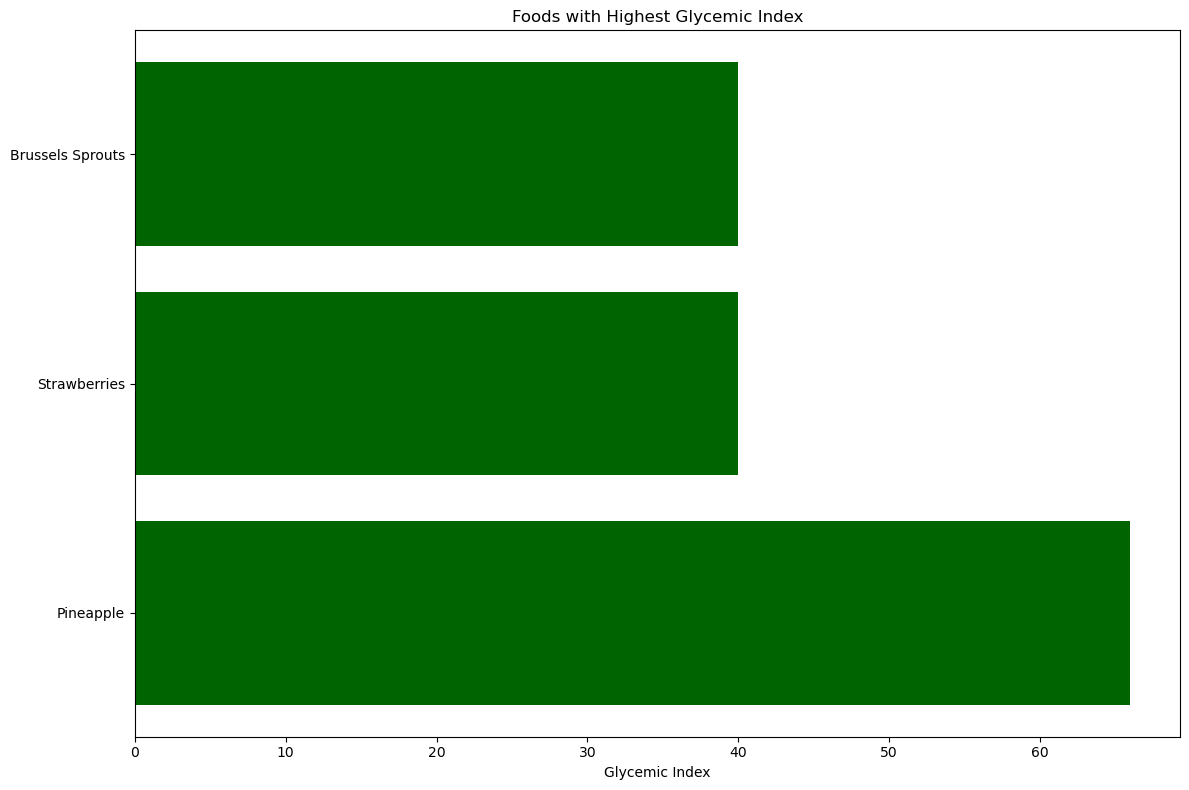

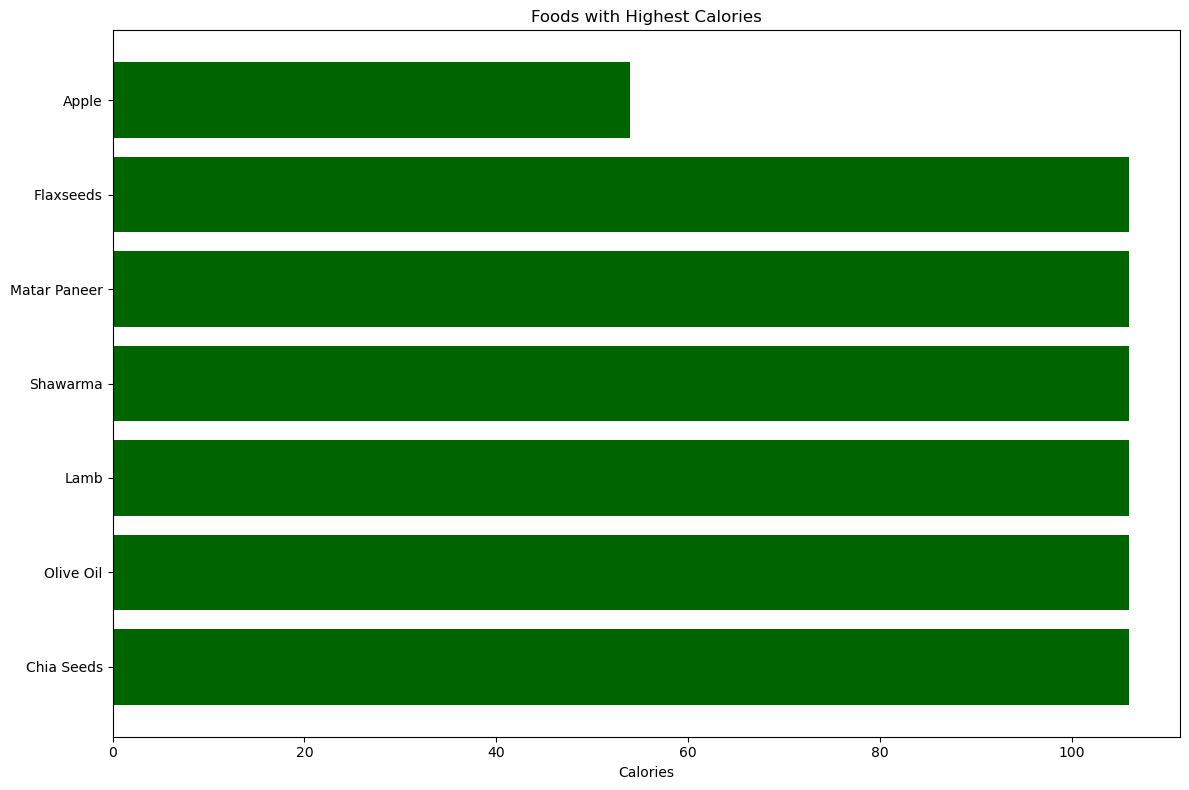

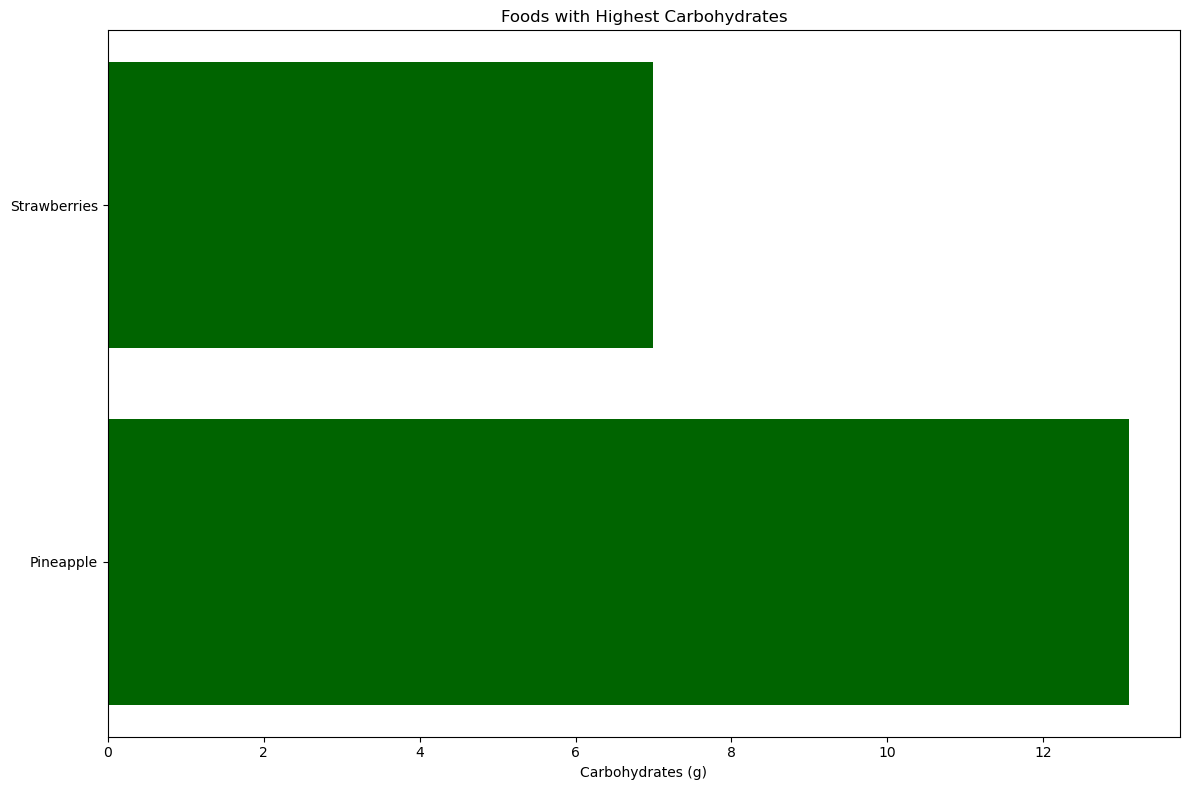

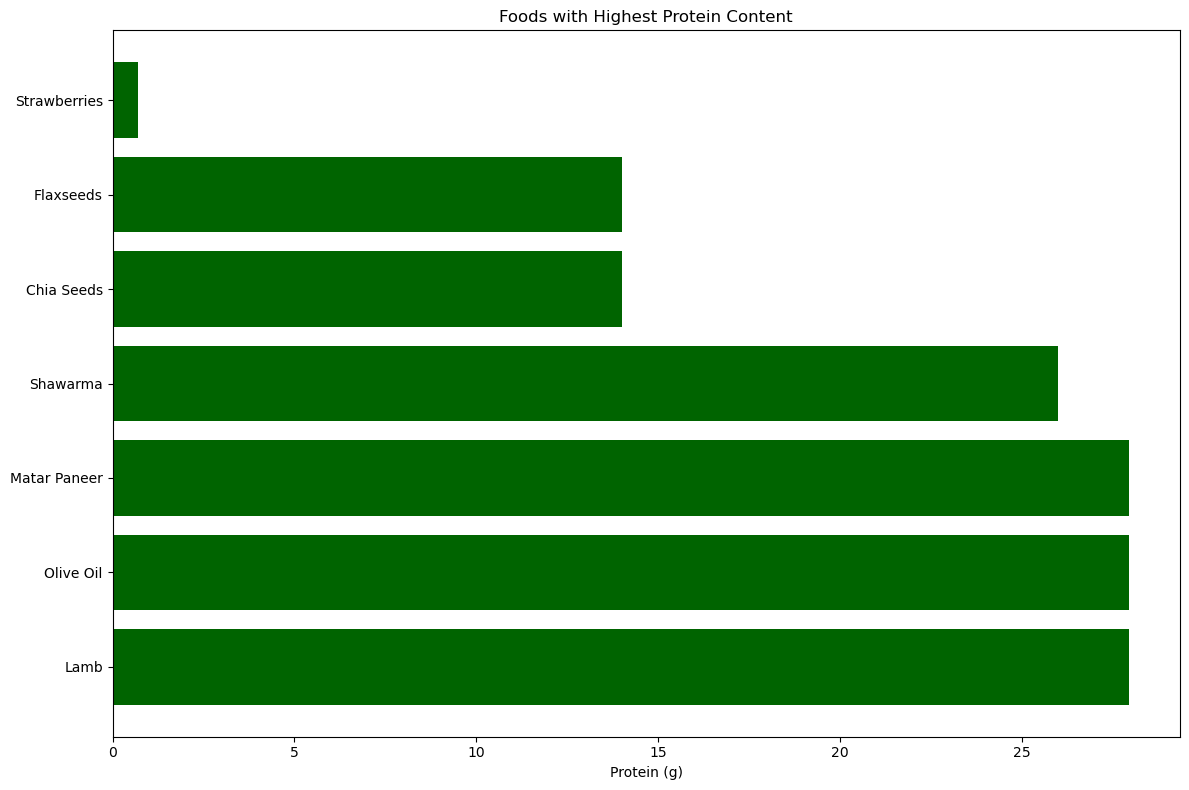

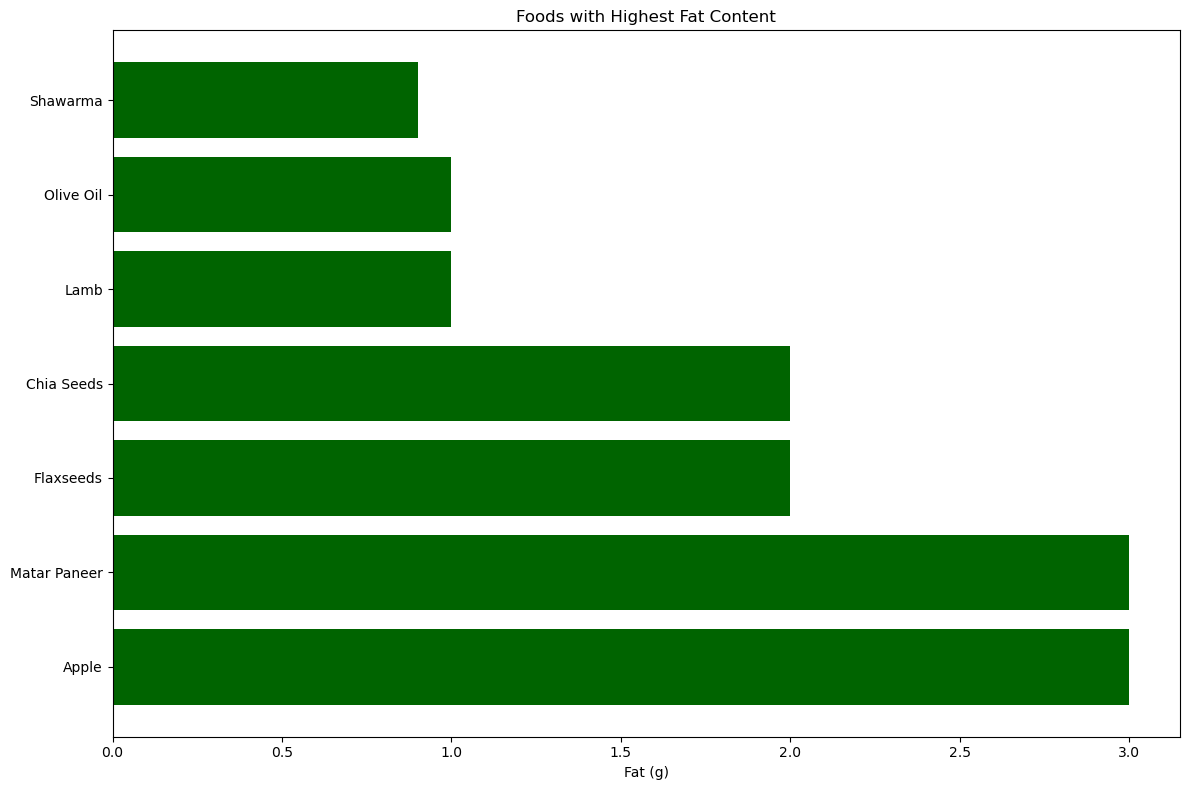

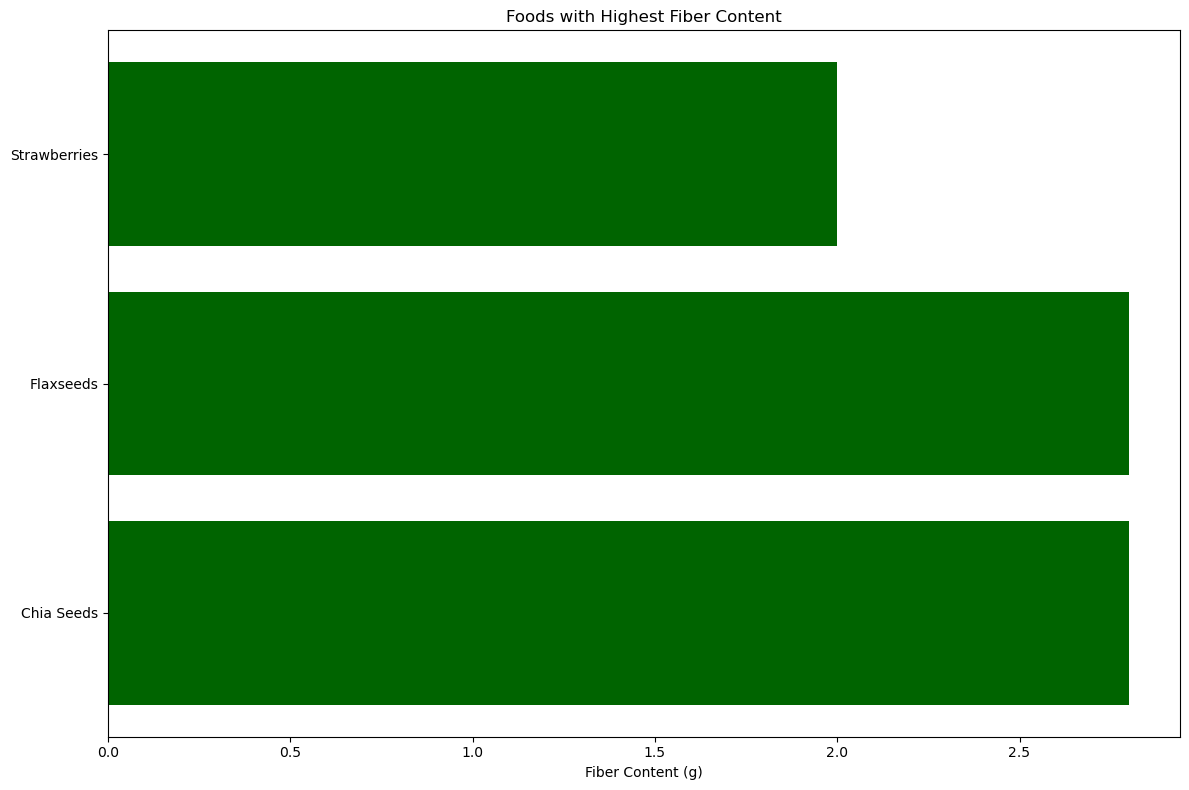

In [17]:
# Foods by Glycemic Index
top_gi = df.sort_values(by='Glycemic Index', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_gi['Food Name'], top_gi['Glycemic Index'],  color='darkgreen')
plt.title('Foods with Highest Glycemic Index')
plt.xlabel('Glycemic Index')
plt.tight_layout()
plt.savefig('visualizations/gi_foods_highest.png', dpi=300)
plt.show()
plt.close()

# Foods by Calories
top_calories = df.sort_values(by='Calories', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_calories['Food Name'], top_calories['Calories'], color='darkgreen')
plt.title('Foods with Highest Calories')
plt.xlabel('Calories')
plt.tight_layout()
plt.savefig('visualizations/calorie_foods_highest.png', dpi=300)
plt.show()
plt.close()

# Foods by Carbohydrates
top_carb = df.sort_values(by='Carbohydrates', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_carb['Food Name'], top_carb['Carbohydrates'],  color='darkgreen')
plt.title('Foods with Highest Carbohydrates')
plt.xlabel('Carbohydrates (g)')
plt.tight_layout()
plt.savefig('visualizations/carb_foods_highest.png', dpi=300)
plt.show()
plt.close()

# Foods by Protein
top_protein = df.sort_values(by='Protein', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_protein['Food Name'], top_protein['Protein'], color='darkgreen')
plt.title('Foods with Highest Protein Content')
plt.xlabel('Protein (g)')
plt.tight_layout()
plt.savefig('visualizations/protein_foods_highest.png', dpi=300)
plt.show()
plt.close()

# Foods by Fat
top_fat = df.sort_values(by='Fat', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_fat['Food Name'], top_fat['Fat'], color='darkgreen')
plt.title('Foods with Highest Fat Content')
plt.xlabel('Fat (g)')
plt.tight_layout()
plt.savefig('visualizations/fat_foods_highest.png', dpi=300)
plt.show()
plt.close()

# Foods by Fiber Content
top_carb = df.sort_values(by='Fiber Content', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_carb['Food Name'], top_carb['Fiber Content'],  color='darkgreen')
plt.title('Foods with Highest Fiber Content')
plt.xlabel('Fiber Content (g)')
plt.tight_layout()
plt.savefig('visualizations/fiber_foods_highest.png', dpi=300)
plt.show()
plt.close()

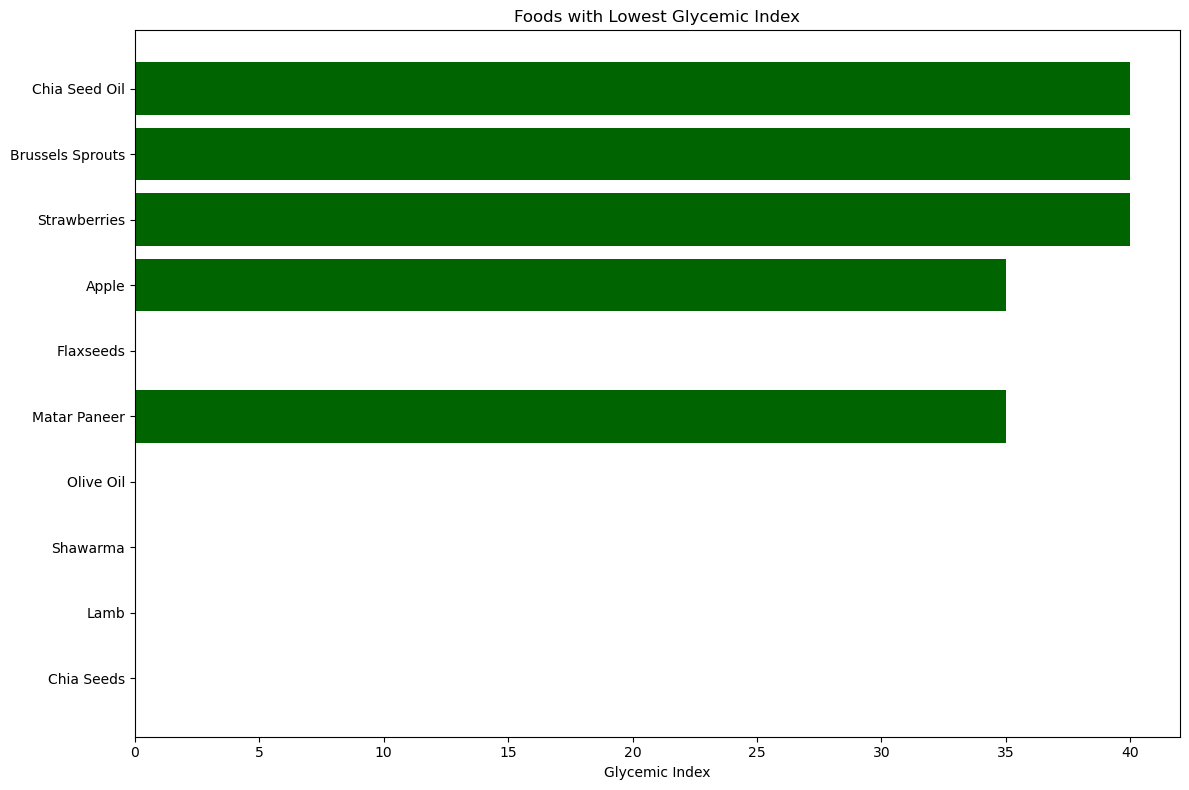

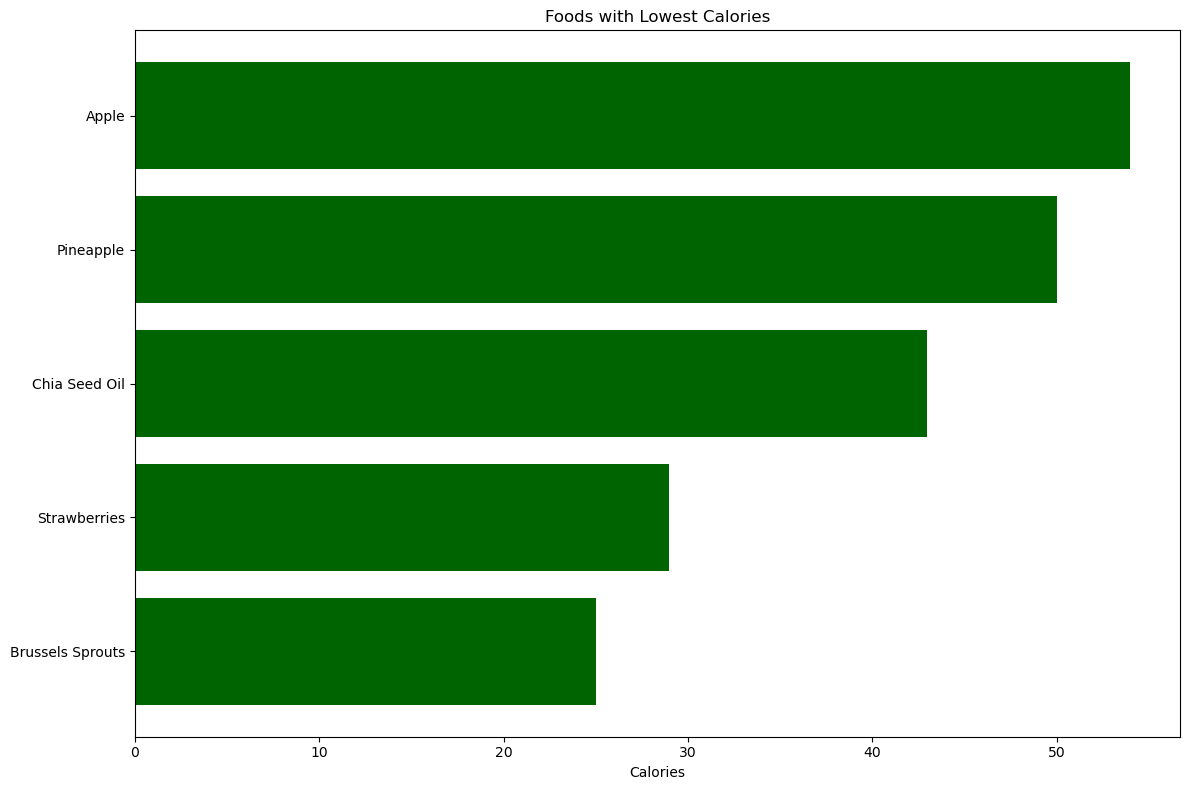

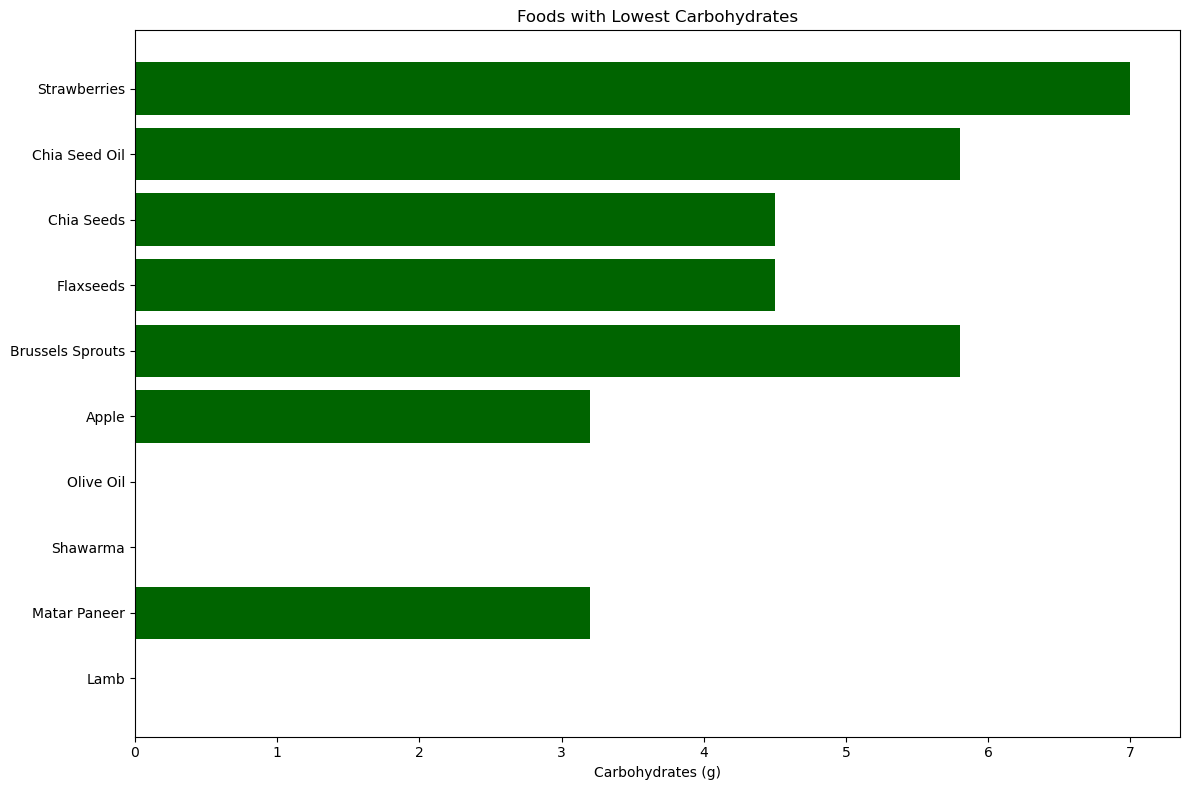

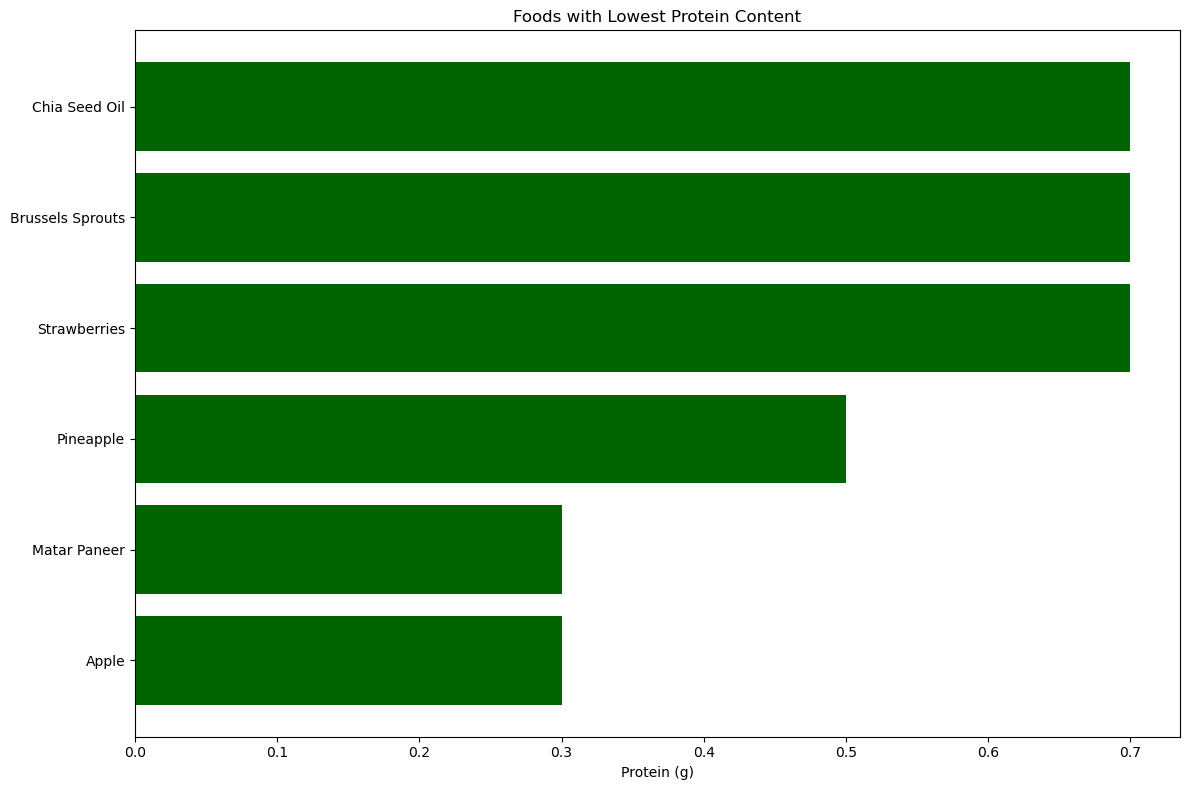

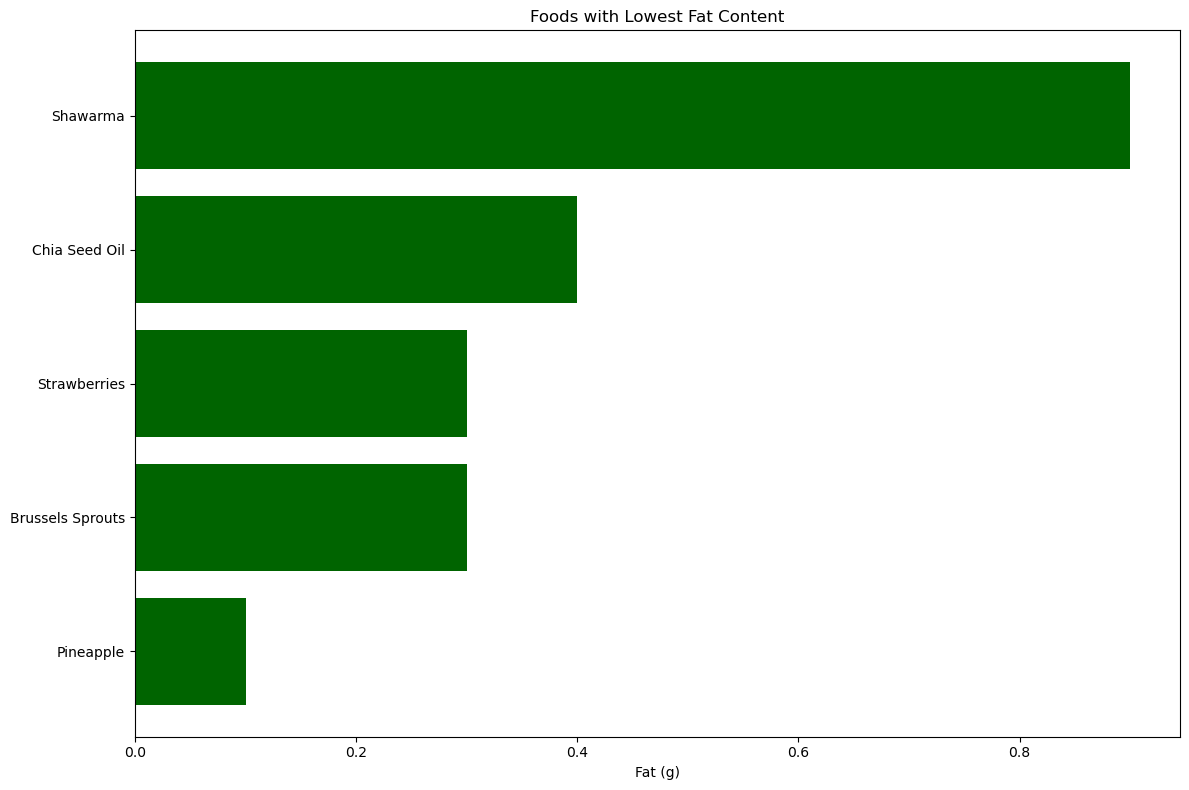

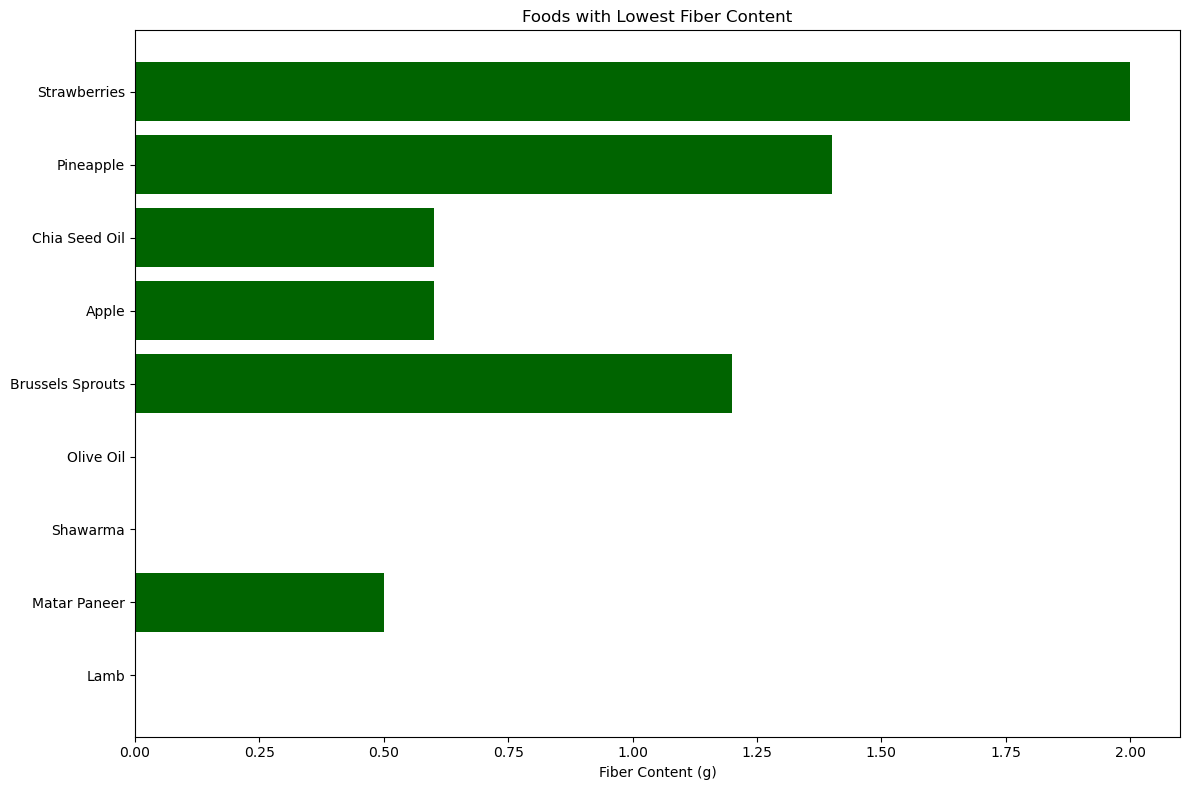

In [19]:
# Foods by Glycemic Index (Lowest)
top_gi = df.sort_values(by='Glycemic Index', ascending=True).head(20)
plt.figure(figsize=(12, 8))
plt.barh(top_gi['Food Name'], top_gi['Glycemic Index'],  color='darkgreen')
plt.title('Foods with Lowest Glycemic Index')
plt.xlabel('Glycemic Index')
plt.tight_layout()
plt.savefig('visualizations/gi_foods_lowest.png', dpi=300)
plt.show()
plt.close()
# Foods by Calories (Lowest)
low_calories = df.sort_values(by='Calories', ascending=True).head(20)
plt.figure(figsize=(12, 8))
plt.barh(low_calories['Food Name'], low_calories['Calories'], color='darkgreen')
plt.title('Foods with Lowest Calories')
plt.xlabel('Calories')
plt.tight_layout()
plt.savefig('visualizations/calorie_foods_lowest.png', dpi=300)
plt.show()
plt.close()

# Foods by Carbohydrates (Lowest)
top_carb = df.sort_values(by='Carbohydrates', ascending=True).head(20)
plt.figure(figsize=(12, 8))
plt.barh(top_carb['Food Name'], top_carb['Carbohydrates'],  color='darkgreen')
plt.title('Foods with Lowest Carbohydrates')
plt.xlabel('Carbohydrates (g)')
plt.tight_layout()
plt.savefig('visualizations/carb_foods_lowest.png', dpi=300)
plt.show()
plt.close()

# Foods by Protein (Lowest)
low_protein = df.sort_values(by='Protein', ascending=True).head(20)
plt.figure(figsize=(12, 8))
plt.barh(low_protein['Food Name'], low_protein['Protein'], color='darkgreen')
plt.title('Foods with Lowest Protein Content')
plt.xlabel('Protein (g)')
plt.tight_layout()
plt.savefig('visualizations/protein_foods_lowest.png', dpi=300)
plt.show()
plt.close()

# Foods by Fat (Lowest)
low_fat = df.sort_values(by='Fat', ascending=True).head(20)
plt.figure(figsize=(12, 8))
plt.barh(low_fat['Food Name'], low_fat['Fat'], color='darkgreen')
plt.title('Foods with Lowest Fat Content')
plt.xlabel('Fat (g)')
plt.tight_layout()
plt.savefig('visualizations/fat_foods_lowest.png', dpi=300)
plt.show()
plt.close()

# Foods by Fiber Content (Lowest)
top_carb = df.sort_values(by='Fiber Content', ascending=True).head(20)
plt.figure(figsize=(12, 8))
plt.barh(top_carb['Food Name'], top_carb['Fiber Content'],  color='darkgreen')
plt.title('Foods with Lowest Fiber Content')
plt.xlabel('Fiber Content (g)')
plt.tight_layout()
plt.savefig('visualizations/fiber_foods_lowest.png', dpi=300)
plt.show()
plt.close()

### Saving Dataset

In [9]:
df.to_csv("processed_data/cleaned_diabetic_foods.csv", index=False)
print("Cleaned dataset saved as cleaned_diabetic_foods.csv")

Cleaned dataset saved as cleaned_diabetic_foods.csv
